### **Ensemble Model**: `Similar Type`

We will demonstrate bagging, rf, and boosting ensemble. First, set the python library that will be needed.

In [1]:
# Import required libraries
import numpy as np
import pandas as pd

Create a synthetic binary classification problem with 1000 examples and 10 input features using make_classification().

In [2]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

X,y = make_classification(n_samples=1000, n_features=10, random_state=2)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size =.2,random_state=2020,stratify=y)

X_train.shape, X_test.shape

((800, 10), (200, 10))

#### **1. Bagging Ensembles**

**Definition**: also known as bootstrap aggregation, is the ensemble learning method that is commonly used to reduce variance within a noisy data set. In bagging, a random sample of data in a training set is selected with replacement—meaning that the individual data points can be chosen more than once. After generating several data samples, these weak models are then trained independently. Depending on the type of task—regression or classification, for example—the average or majority of those predictions yield a more accurate estimate. 

Bagging algorithm has three basic steps:

- **Bootstrapping**:  Bagging leverages a bootstrapping sampling technique to create diverse samples. This resampling method generates different subsets of the training data set by selecting data points at random and with replacement. This means that each time you select a data point from the training data set, you are able to select the same instance multiple times. As a result, a value or instance repeated twice (or more) in a sample.
- **Parallel training**: These bootstrap samples are then trained independently and in parallel with each other using weak or base learners.
- **Aggregation**: Finally, depending on the task (that is, regression or classification), an average or a majority of the predictions are taken to compute a more accurate estimate. In the case of regression, an average is taken of all the outputs predicted by the individual classifiers; this is known as soft voting. For classification problems, the class with the highest majority of votes is accepted; this is known as hard voting or majority voting.

The key challenges of bagging include:

- **Loss of interpretability**: It’s difficult to draw very precise business insights through bagging because due to the averaging involved across predictions. 
- **Computationally expensive**: Bagging slows down and grows more intensive as the number of iterations increase. 
- **Less flexible**: As a technique, bagging works particularly well with algorithms that are less stable. One that are more stable or subject to high amounts of bias do not provide as much benefit as there’s less variation within the data set of the model. 

**Practice:**



In [3]:
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, StratifiedKFold

skfold = StratifiedKFold(n_splits=5)

logreg = LogisticRegression(max_iter=1000)

clf = BaggingClassifier(
    estimator=logreg,
    max_samples=.7,
    n_estimators=50,
)

clf.fit(X_train,y_train)

score = cross_val_score(clf,X_train,y_train, scoring='accuracy',cv=skfold)
print(f'Accuracy : {score.mean():.2f}')

Accuracy : 0.89


Random Forest has multiple decision trees as base learning models, several random trees make a Random Forest. The Random Forest model uses bagging, where we randomly perform row sampling and feature sampling from the dataset froming datasets for every model.

In [4]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(
    n_estimators=50,
    criterion='entropy',
    max_features='sqrt',
    random_state=0
)

clf.fit(X_train,y_train)

score = cross_val_score(clf,X_train,y_train, scoring='accuracy',cv=skfold)
print(f'Accuracy : {score.mean():.2f}')

Accuracy : 0.90


#### **2. Boosting Ensembles**

**Definition**: is an ensemble modeling technique that attempts to build a strong classifier from the number of weak classifiers. It is done by building a model by using weak models in series. Firstly, a model is built from the training data. Then the second model is built which tries to correct the errors present in the first model. This procedure is continued and models are added until either the complete training data set is predicted correctly or the maximum number of models are added. 

The steps to build and combine these models are as:

- Initialize the weights
- Train weak classifiers
- Calculate the error rate and importance of each weak model
- Update data point weight for each data point Wi 
- Normalize the Instance weight 
- Repeat steps 2-5 for K iterations 

**Practice:**

AdaBoost, short for Adaptive Boosting, is an ensemble machine learning algorithm that can be used in a wide variety of classification and regression tasks. It is a supervised learning algorithm that is used to classify data by combining multiple weak or base learners (e.g., decision trees) into a strong learner. AdaBoost works by weighting the instances in the training dataset based on the accuracy of previous classifications.

In [5]:
from sklearn.ensemble import AdaBoostClassifier

clf = AdaBoostClassifier(
    algorithm='SAMME',
    n_estimators=50,
    learning_rate=1,
    random_state=0
)

clf.fit(X_train, y_train)

score = cross_val_score(clf,X_train,y_train, scoring='accuracy',cv=skfold)
print(f'Accuracy : {score.mean():.2f}')

Accuracy : 0.88


Gradient boosting is one of the variants of ensemble methods where you create multiple weak models and combine them to get better performance as a whole.

In [6]:
from sklearn.ensemble import GradientBoostingClassifier

clf = GradientBoostingClassifier(
    n_estimators=50,
    learning_rate=.1,
    random_state=0
)

clf.fit(X_train, y_train)

score = cross_val_score(clf,X_train,y_train, scoring='accuracy',cv=skfold)
print(f'Accuracy : {score.mean():.2f}')

Accuracy : 0.90


XGBoost is a more regularized form of Gradient Boosting. XGBoost uses advanced regularization (L1 & L2), which improves model generalization capabilities. XGBoost delivers high performance as compared to Gradient Boosting. Its training is very fast and can be parallelized across clusters.

In [7]:
from xgboost import XGBClassifier

clf = XGBClassifier(
    n_estimators=50,
    learning_rate=.1,
    random_state=0,
    subsample=.7
)

clf.fit(X_train, y_train)

score = cross_val_score(clf,X_train,y_train, scoring='accuracy',cv=skfold)
print(f'Accuracy : {score.mean():.2f}')

Accuracy : 0.89


### `Application`

`Load Dataset`


In [8]:
data = pd.read_csv('../../csv/white_wine.csv')
data.sample(5, random_state=0)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
422,7.0,0.21,0.28,8.6,0.045,37.0,221.0,0.9954,3.25,0.54,10.4,6.0
107,7.1,0.23,0.35,16.5,0.040,60.0,171.0,0.9990,3.16,0.59,9.1,6.0
253,5.8,0.24,0.44,3.5,0.029,5.0,109.0,0.9913,3.53,0.43,11.7,3.0
235,7.2,0.23,0.38,14.3,0.058,55.0,194.0,0.9979,3.09,0.44,9.0,6.0
311,5.0,0.55,0.14,8.3,0.032,35.0,164.0,0.9968,3.53,0.51,12.5,8.0


`Data Cleaning`

**Duplicated Value**, Deteksi dan kuantifikasi duplikasi data

In [9]:
print(f'Jumlah data duplikat: {data.duplicated().sum()}')
print(f'Persentase data duplikat: {data.duplicated().sum()/len(data)*100:.2f}%')

Jumlah data duplikat: 84
Persentase data duplikat: 16.15%


Sebesar 16.15% data terindikasi duplikat, maka hilangkan salah satunya.

Handling duplikasi data:

In [10]:
data.drop_duplicates(keep='first', inplace=True, ignore_index=True)

**Missing Value**, Deteksi dan kuantifikasi missing value

In [11]:
data.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      1
sulphates               1
alcohol                 1
quality                 1
dtype: int64

Terdapat missing value pada kolom ph, sulphates, alcohol dan quality. Kita akan drop saja missing value tersebut.

In [12]:
data.dropna(inplace=True)

**Change Target**, Mengubah target menjadi kategorikal biner.

In [13]:
data['quality'] = np.where(data['quality']> 6, 1, 0)
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,0
4,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,0


`Data Splitting`

Bagi dataset menjadi train dan test set dengan komposisi 80:20.

In [14]:
# Define features and target
X = data.drop(columns=['quality'])
y = data['quality']

# Separate data into train and test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0, stratify=y
)

In [15]:
data.shape

(435, 12)

In [16]:
X_test.shape

(87, 11)

### `Model Experiment`

Setting parameter dasar untuk menginisialisasi experiment 

In [17]:
from sklearn.preprocessing import RobustScaler
from imblearn.pipeline import Pipeline

scaler = RobustScaler()

**Benchmark Model**

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier, StackingClassifier

In [19]:
# Define the models
logreg = LogisticRegression(max_iter=1000)
knn = KNeighborsClassifier()
dtree = DecisionTreeClassifier(max_depth=5, random_state=0)

# Base Models
logreg_pipeline = Pipeline([
    ('scaling', scaler),
    ('modeling', logreg)
])

knn_pipeline = Pipeline([
    ('scaling', scaler),
    ('modeling', knn)
])

dtree_pipeline = Pipeline([
    ('modeling', dtree)
])

# Meta learner
meta_logreg = LogisticRegression(max_iter=1000)

# Voting Classifier (Hard)
voting_clf_hard = VotingClassifier(
    estimators=[
        ('clf1', logreg_pipeline),
        ('clf2', knn_pipeline),
        ('clf3', dtree_pipeline)
    ], voting='hard'
)

# Voting Classifier (Soft)
voting_clf_soft = VotingClassifier(
    estimators=[
        ('clf1', logreg_pipeline),
        ('clf2', knn_pipeline),
        ('clf3', dtree_pipeline)
    ], voting='soft'
)

# Stacking Classifier
stacking_clf = StackingClassifier(
    estimators=[
        ('clf1', logreg_pipeline),
        ('clf2', knn_pipeline),
        ('clf3', dtree_pipeline)
    ],
    final_estimator=meta_logreg
)

# Bagging
bagging_clf = BaggingClassifier(
    estimator=logreg,
    n_estimators=50,
    max_samples=.7,
    random_state=0
)

# RF
rf_clf = RandomForestClassifier(
    n_estimators=50,
    criterion='entropy',
    max_features='sqrt',
    random_state=0,
)

ab_clf = AdaBoostClassifier(
    algorithm='SAMME',
    n_estimators=50,
    learning_rate=1,
    random_state=0
)

gb_clf = GradientBoostingClassifier(
    n_estimators=50,
    learning_rate=.1,
    random_state=0
)

xgb_clf = XGBClassifier(
    n_estimators=50,
    learning_rate=.1,
    random_state=0,
    subsample=.7
)



In [20]:
from sklearn.model_selection import cross_val_score, StratifiedKFold

# Define models
models = [logreg_pipeline, knn_pipeline, dtree_pipeline, 
          voting_clf_hard, voting_clf_soft, stacking_clf,bagging_clf,rf_clf,ab_clf,gb_clf,xgb_clf]
model_names = ['LogisticRegression', 'KNeigborsClassifier', 'DecisionTree',
               'Voting Classifier (Hard)', 'Voting Classifier (Soft)', 'Stacking Classifier',
               'BaggingClassifier','RandomForestClassifier','AdaBoostClassifier','GradientBoostingClassifier','XGBClassifier']

# Create list to store evaluation score
f1_mean = []
f1_std = []
all_f1 = []

# Cross Validation
for model in models:

    skfold = StratifiedKFold(n_splits=5)

    model_cv = cross_val_score(
        model,
        X_train,
        y_train,
        cv=skfold,
        scoring='f1',
        n_jobs=-1
    )

    f1_mean.append(model_cv.mean())    
    f1_std.append(model_cv.std())    
    all_f1.append(model_cv.round(4))    

In [21]:
pd.DataFrame({
    'model': model_names,
    'mean f1': f1_mean,
    'std f1': f1_std,
    'all score': all_f1
}).sort_values('mean f1', ascending=False)

,model,mean f1,std f1,all score
0,LogisticRegression,0.992000,0.016000,"[1.0, 0.96, 1.0, 1.0, 1.0]"
5,Stacking Classifier,0.975304,0.020204,"[1.0, 0.96, 0.96, 1.0, 0.9565]"
9,GradientBoostingClassifier,0.941275,0.056419,"[0.96, 0.8333, 1.0, 0.9565, 0.9565]"
8,AdaBoostClassifier,0.939036,0.045133,"[0.96, 0.8696, 1.0, 0.9091, 0.9565]"
10,XGBClassifier,0.932382,0.057347,"[1.0, 0.8333, 0.963, 0.9091, 0.9565]"
3,Voting Classifier (Hard),0.923789,0.049178,"[0.96, 0.8333, 0.96, 0.9565, 0.9091]"
4,Voting Classifier (Soft),0.902577,0.089754,"[0.96, 0.7273, 0.96, 0.9565, 0.9091]"
7,RandomForestClassifier,0.888970,0.116277,"[0.96, 0.6667, 1.0, 0.9091, 0.9091]"
2,DecisionTree,0.859130,0.101001,"[0.96, 0.6957, 0.96, 0.88, 0.8]"
1,KNeigborsClassifier,0.806192,0.094593,"[0.8333, 0.6364, 0.7826, 0.9091, 0.8696]"


**Predict Benchmark Model to Test Set**

Untuk mengukur performa akhir model

In [22]:
from sklearn.metrics import f1_score

# Models
models = [logreg_pipeline, knn_pipeline, dtree_pipeline, 
          voting_clf_hard, voting_clf_soft, stacking_clf,
          bagging_clf,rf_clf,ab_clf,gb_clf,xgb_clf]

# Create list to store evaluation score
list_f1 = []
dict_pred = {}
dict_proba = {}

# Predict to test set
for model, name in zip(models, model_names):

    # fitting to train set
    model.fit(X_train, y_train)

    # predict to test set
    y_pred = model.predict(X_test)
    dict_pred[name] = y_pred

    if model in [logreg_pipeline, knn_pipeline, dtree_pipeline, voting_clf_soft]:
        y_proba = model.predict_proba(X_test)
        dict_proba[name] = y_proba[:, 1].round(4)

    # evaluate score
    score = f1_score(y_test, y_pred)
    list_f1.append(score)

In [23]:
pd.DataFrame({
    'model': model_names,
    'F1 score': list_f1
}).sort_values('F1 score', ascending=False)

,model,F1 score
9,GradientBoostingClassifier,1.000000
5,Stacking Classifier,0.967742
8,AdaBoostClassifier,0.967742
2,DecisionTree,0.941176
10,XGBClassifier,0.933333
4,Voting Classifier (Soft),0.903226
0,LogisticRegression,0.896552
3,Voting Classifier (Hard),0.896552
1,KNeigborsClassifier,0.785714
7,RandomForestClassifier,0.769231


FINAL MODEL

In [24]:
from sklearn.metrics import classification_report,confusion_matrix

final_model = GradientBoostingClassifier(
    n_estimators=50,
    learning_rate=.1,
    random_state=0
)

final_model.fit(X_train, y_train)
y_pred = final_model.predict(X_test)

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        71
           1       1.00      1.00      1.00        16

    accuracy                           1.00        87
   macro avg       1.00      1.00      1.00        87
weighted avg       1.00      1.00      1.00        87



<Axes: >

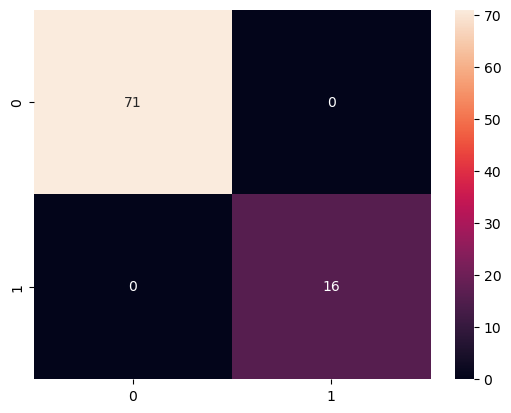

In [25]:
import seaborn as sns

sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)